# SESIÓN 02: SEPARACIÓN, VALIDACIÓN Y EVALUACIÓN PARA ALGORITMOS DE ML

## EJEMPLO 01: SEPARACIÓN DE LA BASE DE DATOS

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

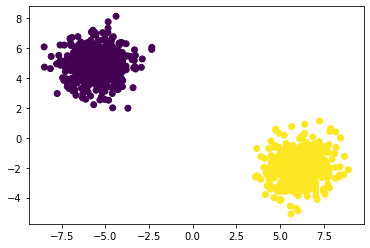

In [19]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [29]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    print(temp_size)
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.60,0.10,0.30)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

0.4
(600, 2)
(100, 2)
(300, 2)


## RETO 01

In [40]:
#Particionando en 50% entrenamiento, X% validacion, 25% prueba

[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.50,0.25,0.25)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

0.5
(500, 2)
(250, 2)
(250, 2)


In [41]:
#Particionando en 70% entrenamiento, 10% validacion, X% prueba

[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.70,0.10,0.20)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

0.30000000000000004
(699, 2)
(100, 2)
(201, 2)


## EJEMPLO 2: VALIDACIÓN K-FOLD

En este ejemplo vamos a generar unos datos dummy con numpy, y vamos a separarlos de tal manera que puedas elegir en cuantas separaciones deseas con K-fold. Es importante que veas como los datos son separados aleatoriamente y no se repiten en cada fold. Si la cantidad de folds no permiten bloques, algunos ciclos tendrán mas (o menos) datos.

Nota: Retira el random_seed para tener datos únicos en cada ocasión

In [42]:
import numpy as np
from sklearn.model_selection import KFold

In [49]:
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

K = 4
random_seed = 48
aleatorio = True

kfold = KFold(K, aleatorio, random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(data):
    print("Ciclo: "+str(ciclo))
    print("\t datos para entrenamiento:"+str(data[indices_train]))
    print("\t datos para prueba:"+str(data[indices_test]))
    ciclo+=1

Ciclo: 1
	 datos para entrenamiento:[ 1  2  3  4  5  6  7 11 12]
	 datos para prueba:[ 8  9 10]
Ciclo: 2
	 datos para entrenamiento:[ 1  2  4  5  8  9 10 11 12]
	 datos para prueba:[3 6 7]
Ciclo: 3
	 datos para entrenamiento:[ 1  2  3  4  6  7  8  9 10]
	 datos para prueba:[ 5 11 12]
Ciclo: 4
	 datos para entrenamiento:[ 3  5  6  7  8  9 10 11 12]
	 datos para prueba:[1 2 4]


C:\Otro\Anaconda\envs\Class_test\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=48 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## RETO 02

En este reto haremos K-fold de datos! si tienes un dataset para tu proyecto final, aprovecha para usarlo. En mi caso utilizaremos 1000 blobs.

Nota: Si vas a hacer K-fold y usarlo en la vida real, no uses un random_seed.

In [45]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold

In [50]:
x, y = make_blobs(n_samples=10000, centers=4, n_features=5)

K = 5
random_seed = 48
aleatorio = True

kfold = KFold(K, aleatorio, random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(x):
    print("Ciclo: "+str(ciclo))
    
    print("Usaré "+str(x[indices_train].shape)+" datos para entrenar (entrada)")
    print("Usaré "+str(y[indices_train].shape)+" datos para entrenar (salida)")
       
    ciclo+=1

Ciclo: 1
Usaré (8000, 5) datos para entrenar (entrada)
Usaré (8000,) datos para entrenar (salida)
Ciclo: 2
Usaré (8000, 5) datos para entrenar (entrada)
Usaré (8000,) datos para entrenar (salida)
Ciclo: 3
Usaré (8000, 5) datos para entrenar (entrada)
Usaré (8000,) datos para entrenar (salida)
Ciclo: 4
Usaré (8000, 5) datos para entrenar (entrada)
Usaré (8000,) datos para entrenar (salida)
Ciclo: 5
Usaré (8000, 5) datos para entrenar (entrada)
Usaré (8000,) datos para entrenar (salida)


## EJEMPLO 03: LEAVE-ONE-OUT CROSS VALIDATION

En este ejemplo vamos a generar unos datos dummy con numpy, y vamos a separarlos de tal manera que puedas elegir en cuantas separaciones deseas con K-fold. Es importante que veas como los datos son separados aleatoriamente y no se repiten en cada fold. Si la cantidad de folds no permiten bloques, algunos ciclos tendrán mas (o menos) datos.

In [52]:
import numpy as np
from sklearn.model_selection import KFold

In [60]:
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

K = data.shape[0] # K = numero de muestras...
random_seed = 48
aleatorio = True

kfold = KFold(K, aleatorio, random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(data):
    print("Ciclo: "+str(ciclo))
    print("\t datos para entrenamiento:"+str(data[indices_train]))
    print("\t datos para prueba:"+str(data[indices_test]))
    ciclo+=1

Ciclo: 1
	 datos para entrenamiento:[ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
	 datos para prueba:[2]
Ciclo: 2
	 datos para entrenamiento:[ 1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20]
	 datos para prueba:[10]
Ciclo: 3
	 datos para entrenamiento:[ 1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
	 datos para prueba:[6]
Ciclo: 4
	 datos para entrenamiento:[ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20]
	 datos para prueba:[8]
Ciclo: 5
	 datos para entrenamiento:[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20]
	 datos para prueba:[9]
Ciclo: 6
	 datos para entrenamiento:[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20]
	 datos para prueba:[13]
Ciclo: 7
	 datos para entrenamiento:[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20]
	 datos para prueba:[19]
Ciclo: 8
	 datos para entrenamiento:[ 1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
	 datos para prueba:[4]
Ciclo: 9
	 datos para entrenamiento:[ 1  2  3

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=48 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## RETO 03

En este reto vamos a generar un Leave-one-out cross validation (LOOCV), y para ello necesitarás un dataset. Para efectos de este reto, yo usaré 1000 blobs, lo que llevará 1000 ciclos.

In [61]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold

In [64]:
x, y = make_blobs(n_samples=100, centers=2, n_features=2)

K = y.shape[0]
random_seed = 48
aleatorio = True

print(y.shape)

(100,)


In [65]:
K = y.shape[0]
random_seed = 48
aleatorio = True

kfold = KFold(K, aleatorio, random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(x):
    print("Ciclo: "+str(ciclo))
    
    print("Usare "+str(x[indices_train].shape)+" datos para entrenar (entrada)")
    print("Usare "+str(y[indices_train].shape)+" datos para entrenar (salida)")
        
    ciclo+=1

Ciclo: 1
Usare (99, 2) datos para entrenar (entrada)
Usare (99,) datos para entrenar (salida)
Ciclo: 2
Usare (99, 2) datos para entrenar (entrada)
Usare (99,) datos para entrenar (salida)
Ciclo: 3
Usare (99, 2) datos para entrenar (entrada)
Usare (99,) datos para entrenar (salida)
Ciclo: 4
Usare (99, 2) datos para entrenar (entrada)
Usare (99,) datos para entrenar (salida)
Ciclo: 5
Usare (99, 2) datos para entrenar (entrada)
Usare (99,) datos para entrenar (salida)
Ciclo: 6
Usare (99, 2) datos para entrenar (entrada)
Usare (99,) datos para entrenar (salida)
Ciclo: 7
Usare (99, 2) datos para entrenar (entrada)
Usare (99,) datos para entrenar (salida)
Ciclo: 8
Usare (99, 2) datos para entrenar (entrada)
Usare (99,) datos para entrenar (salida)
Ciclo: 9
Usare (99, 2) datos para entrenar (entrada)
Usare (99,) datos para entrenar (salida)
Ciclo: 10
Usare (99, 2) datos para entrenar (entrada)
Usare (99,) datos para entrenar (salida)
Ciclo: 11
Usare (99, 2) datos para entrenar (entrada)
Usare

## EJEMPLO 04: MATRIZ DE CONFUSIÓN

En este ejemplo vamos a generar una matriz de confusión y obtener true positives (TP), true negatives (TN), false positives (FP) y false negatives (FN)

In [66]:
import numpy as np
from sklearn.metrics import confusion_matrix

Supongamos que tenemos unos datos "y_esperados" y nuestro algoritmo de Machine Learning nos arrojó los datos "y_predichos"

In [68]:
y_esperados = np.array([1,1,1,1,0,0,0,0])
y_predichos = np.array([1,0,1,0,1,0,0,0])
resultado = confusion_matrix(y_esperados, y_predichos)
print(resultado)

[[3 1]
 [2 2]]


Y ahora con estos datos, podemos obtener los TP, TN, FP, y FN de la siguiente manera:

In [72]:
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

True positives: 2
True negatives: 3
False positives: 1
False negative: 2


## RETO 04

Genera funciones para calcular las

In [70]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    return accuracy

In [74]:
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP+FN)
    return sensibilidad

In [75]:
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN+FP)
    return especificidad

Con las funciones anteriormente creadas, obtén las métricas de la clasificación realizada

In [76]:
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Precision:0.625%
Sensibilidad:0.5%
Especificidad:0.75%
